In [1]:
#importing important libraries.
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd  
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load the dataset which is alread is in sklearn library
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


#### data: contains the information for various houses
#### target: prices of the house
#### feature_names: names of the features
#### DESCR: describes the dataset

In [3]:
print(boston.feature_names)   #13 features

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Above cell describes that:-

1-Number of Instances: 506(Rows)
    
2-Number of Attributes: 13 numeric/categorical predictive. 
    
3-Median Value (attribute 14) is usually the target.

4-**Missing Attribute Values: None**

In [5]:
#making dataframes of features
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#making dataframes of tagret
# target is MEDV 
target=pd.DataFrame(boston.target,columns=['target'])
target.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
#min and max in target column
print(max(target['target']))
print(min(target['target']))

50.0
5.0


In [8]:
#now concatenate features and target into a sigle dataframe
#axis=1 concatenate column wise
df=pd.concat([features,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#describe statistical description of dataset
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


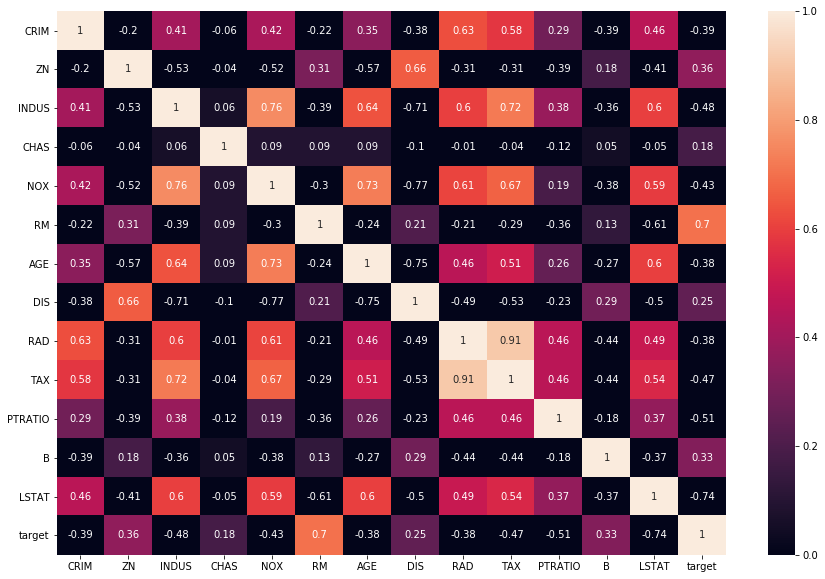

In [10]:
corr = df.corr('pearson').round(2)
# annot = True to print the values inside the square
plt.subplots(figsize=(15,10))
sns.heatmap(data=corr,vmin=0, vmax=1, annot=True)

## observations
1- looking at the correlation matrix we can see that RM has a strong positive
correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

2- The features RAD, TAX have a multi-colenearity of 0.91.

3-The features DIS and AGE which have a correlation of -0.75.

4-top features that can be used for predicton are RM,LSTAT,PTRATIO.

In [11]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [12]:
#making bar 
corrs=[abs(corr[attr]['target']) for attr in list(features)]
corrs

[0.39, 0.36, 0.48, 0.18, 0.43, 0.7, 0.38, 0.25, 0.38, 0.47, 0.51, 0.33, 0.74]

In [13]:
l=list(zip(corrs,list(features)))
l

[(0.39, 'CRIM'),
 (0.36, 'ZN'),
 (0.48, 'INDUS'),
 (0.18, 'CHAS'),
 (0.43, 'NOX'),
 (0.7, 'RM'),
 (0.38, 'AGE'),
 (0.25, 'DIS'),
 (0.38, 'RAD'),
 (0.47, 'TAX'),
 (0.51, 'PTRATIO'),
 (0.33, 'B'),
 (0.74, 'LSTAT')]

In [14]:
#sort the list of pairs in decreasing order
#with the corelation values as the key for sorting
l.sort(key= lambda x:x[0], reverse=True)
l

[(0.74, 'LSTAT'),
 (0.7, 'RM'),
 (0.51, 'PTRATIO'),
 (0.48, 'INDUS'),
 (0.47, 'TAX'),
 (0.43, 'NOX'),
 (0.39, 'CRIM'),
 (0.38, 'AGE'),
 (0.38, 'RAD'),
 (0.36, 'ZN'),
 (0.33, 'B'),
 (0.25, 'DIS'),
 (0.18, 'CHAS')]

In [15]:
'''zip(*l)--takes pair of list which look like [[a,b,c] 
                                                [d,e,f] 
                                                [g,h,i]]
                                        
and returns [[a,d,g] 
            [b,e,f] 
            [c,f,i]]'''


corrs,labels=list(zip(*l))
print(corrs)
print(labels)


(0.74, 0.7, 0.51, 0.48, 0.47, 0.43, 0.39, 0.38, 0.38, 0.36, 0.33, 0.25, 0.18)
('LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD', 'ZN', 'B', 'DIS', 'CHAS')


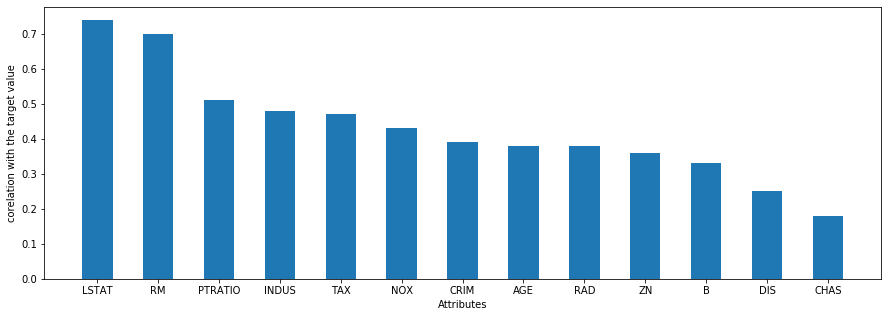

In [16]:
#plot correlation with respect to the target as a bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('corelation with the target value')
plt.xticks(index,labels)
plt.show()

## Top features that can be used for predicton are RM,LSTAT,PTRATIO.
## These attributes have highest correlation with the target

In [17]:
lst=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B','target']
X=df.drop(lst,axis=1)
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [18]:
Y = target
Y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


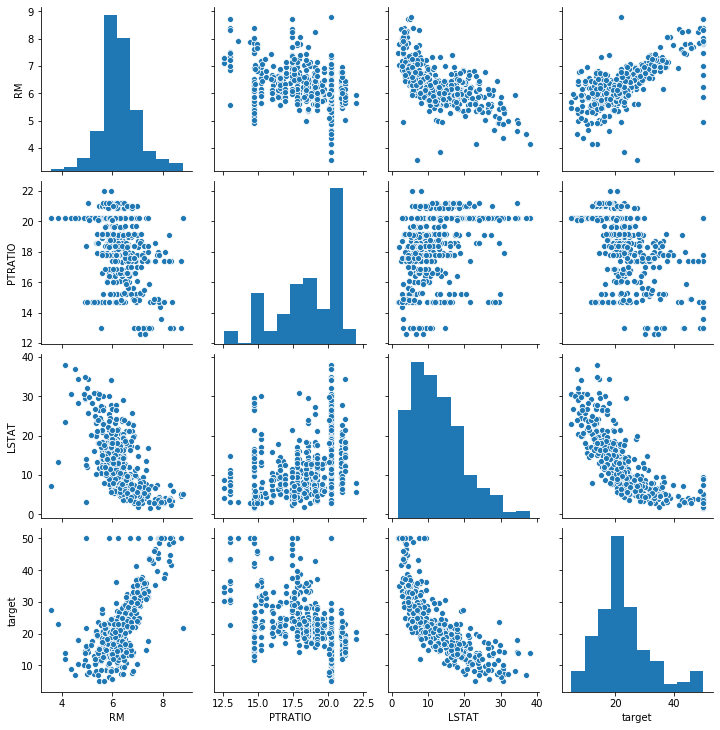

In [19]:
boston_dataset_best_features=pd.concat([X,target],axis=1)
sns.pairplot(boston_dataset_best_features)

### Observation
1-RM have direct relation with target

2-LSTAT have inverse relation with target

## Normalization of data

In [20]:
#now performing normalization so that each feature come onto same scale
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X)
X

array([[0.57750527, 0.28723404, 0.08967991],
       [0.5479977 , 0.55319149, 0.2044702 ],
       [0.6943859 , 0.55319149, 0.06346578],
       ...,
       [0.65433991, 0.89361702, 0.10789183],
       [0.61946733, 0.89361702, 0.13107064],
       [0.47307913, 0.89361702, 0.16970199]])

In [21]:

XX=pd.DataFrame(X,columns=['RM','PTRATIO','LSTAT'])
XX.head()

,RM,PTRATIO,LSTAT
0,0.577505,0.287234,0.089680
1,0.547998,0.553191,0.204470
2,0.694386,0.553191,0.063466
3,0.658555,0.648936,0.033389
4,0.687105,0.648936,0.099338


In [22]:
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y)
print(Y[:5])

[[0.42222222]
 [0.36888889]
 [0.66      ]
 [0.63111111]
 [0.69333333]]


In [23]:
YY=pd.DataFrame(Y,columns=['TARGET'])
YY.head()

,TARGET
0,0.422222
1,0.368889
2,0.660000
3,0.631111
4,0.693333


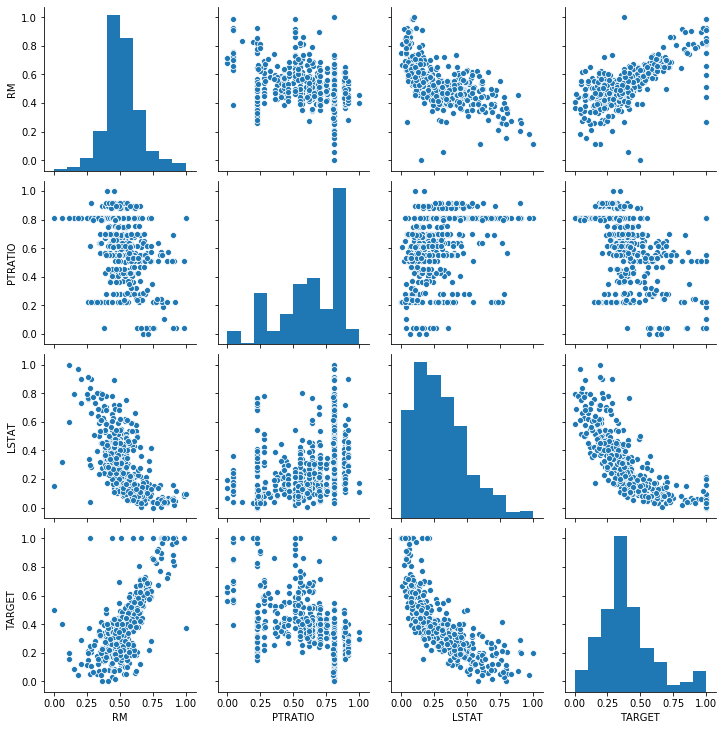

In [24]:
boston_dataset_best_features=pd.concat([XX,YY],axis=1)
sns.pairplot(boston_dataset_best_features)

## Model Building

In [25]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.3, random_state = 30)

### 1-Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

y_predict=lr_model.predict(X_test)

r2score=r2_score(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("R2 score of linear regression model = ",r2score)
print("Mean_squared_error of linear regression model =  ",mse)

R2 score of linear regression model =  0.6523764682865858
Mean_squared_error of linear regression model =   0.01275276017090933


### 2-Ridge Regression

In [27]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X,Y)
prediction_ridge=ridge.predict(X_test)
r2score=r2_score(y_test,prediction_ridge)
mse=mean_squared_error(y_test,prediction_ridge)
print("R2 score of linear regression model = ",r2score)
print("Mean_squared_error of linear regression model =  ",mse)

R2 score of linear regression model =  0.6620997377017814
Mean_squared_error of linear regression model =   0.01239605669252872


### 3-Decision Tree Regressor

In [28]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
decision_regressor = tree.DecisionTreeRegressor(max_depth=4)
decision_regressor.fit(X,Y)
y_pred_dt = decision_regressor.predict(X_test)
r2score_dt=r2_score(y_test,y_pred_dt)
mse=mean_squared_error(y_test,y_pred_dt)
print("R2 score of random forest regressor = ",r2score_dt)
print("Mean_squared_error of Decision tree regressor model =  ",mse)

R2 score of random forest regressor =  0.8759090482482199
Mean_squared_error of Decision tree regressor model =   0.004552344714036706


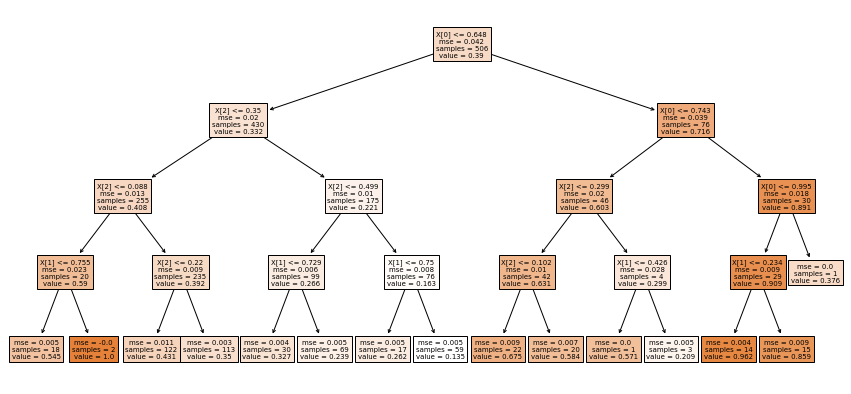

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
decision_tree=tree.plot_tree(decision_regressor,filled=True)
plt.savefig('decision_tree.png')
plt.show()

## Conclusion
- RM,LSTAT,PTRATIO have the highest corelation with the target i.e MEDV
- RM have direct relation with Target.
- LSTAT have inverse relation with Target.
- with **Linear Regression model** we get r2-score of 0.65
- with **RidgeRegression** we get r2-score of 0.66
- with **DecisionTree Regressor** we get r2-score of 0.87
### so DecisionTree regressor can be used for prediction prices of houses in Boston.